In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate Data

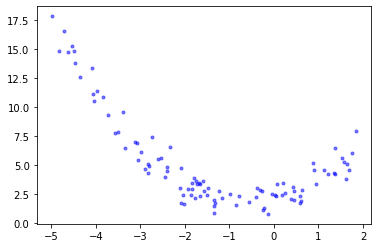

In [183]:
np.random.seed(7)
x = 7 * np.random.rand(100, 1) - 5
y = 0.8 * x**2 + 0.9*x + 2 + np.random.randn(100, 1)
raw_data = {
    "1": [item for sublist in x for item in sublist],
    "label": [item for sublist in y for item in sublist]
}
d_nl = pd.DataFrame(raw_data)

plt.plot(d_nl["1"], d_nl["label"], 'b.', alpha=0.5)

In [184]:
d_nl.head(5)

,1,label
0,-4.465842,13.739711
1,0.459432,1.991580
2,-1.931135,2.945694
3,0.064256,3.358019
4,1.845927,7.916870


# Neural Network Algorithm

To-Dos:
1. First write in function form, then generalize to a class
2. Add different types of activation functions and experiment with their differences

## Initialization

In [186]:
# initialize parameters
layers = 1
epochs = 20000
num_inputs = 1
label = d_nl['label'].to_numpy()

In [187]:
# initialize weights
def init_weights(num_inputs):
    """
        Initialize weights at random from a Gaussian distribution
        with mean 0 and standard deviation 1/m
    """

    weights_init = []
    for _ in range(layers):
        w_l = [np.random.normal(0, 1)] # weight parameters for one layer， [wl_0, wl]
        for _ in range(num_inputs):
            w_l.append(np.random.normal(0, 1/num_inputs))
        weights_init.append(w_l)
    return weights_init

print(init_weights(num_inputs))

[[0.11655993973536867, -1.8538058715077061]]


In [188]:
def prepare_x(index, training_data):
    x = [1]
    for column_name in training_data.columns:
        if column_name != "label":
            x.append(training_data[column_name].to_numpy()[index])
    return x

In [189]:
# helper functions
def sigmoid(Z):
    return [1.0 / (1.0 + np.exp(-z)) for z in Z]

def sigmoid_nl(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_deriv(Z):
    return [sigmoid_nl(z)*(1-sigmoid_nl(z)) for z in Z]

def error(predicted, target):
    return np.power(predicted-target, 2)

def error_predicted_deriv(predicted, target):
    return 2*(predicted-target)

## NN Training

In [190]:
# per iteration (epoch) training
def train_epoch(A0, index, learn_rate, weights, epoch):
    """
        A0 is x_i, where i is randomly selected from gd
    """
    A = [A0]
    z = [0]
    w = weights

    # feedforward
    for layer in range(layers):
        z_l = np.multiply(np.transpose(w[layer]), A[layer])
        A_l = sigmoid(z_l)
        A.append(A_l)
        z.append(z_l)

    if epoch % 1500 == 0:
        err = error(A[-1], label[index])
        print(f"epoch: {epoch}, err: {err}")
        print(f"current weights: {w}")

    # backward propagation
    for layer in np.arange(layers, 0, -1):
        error_deriv = error_predicted_deriv(A[layer], label[index])
        sigm_deriv = sigmoid_deriv(z[layer])
        gradient = np.multiply(np.multiply(sigm_deriv, error_deriv), A[layer-1])
        w[layer-1] -= learn_rate * gradient
    
    return w

In [191]:
# perform sgd
def train():
    weights = init_weights(num_inputs)
        
    for t in range(epochs):
        learn_rate = 1
        if t != 0:
            learn_rate = 1/t
        length = len(label)
        index = np.random.randint(0, length-1)
        inpt = prepare_x(index, d_nl)
        weights = train_epoch(A0=inpt, index=index, learn_rate=learn_rate, weights=weights, epoch=t)
    
    return weights

In [192]:
weights = train()

epoch: 0, err: [20.58486197 20.81216526]
current weights: [[-1.3698597189791943, 0.7311543854273908]]
epoch: 1500, err: [107.06319723 106.89780345]
current weights: [array([ 4.5067113 , -1.46943788])]
epoch: 3000, err: [4.21773804 4.34986899]
current weights: [array([ 4.56635211, -1.4802737 ])]
epoch: 4500, err: [1.43957656 1.80324042]
current weights: [array([ 4.59979205, -1.47464641])]
epoch: 6000, err: [3.03780091 3.3266127 ]
current weights: [array([ 4.62303082, -1.47326644])]
epoch: 7500, err: [14.76077272 14.9021236 ]
current weights: [array([ 4.64004603, -1.47462329])]
epoch: 9000, err: [2.17763474 3.81675707]
current weights: [array([ 4.65404752, -1.471807  ])]
epoch: 10500, err: [25.67018387 35.8442433 ]
current weights: [array([ 4.66634592, -1.47188243])]
epoch: 12000, err: [2.00568685 3.90289174]
current weights: [array([ 4.67634458, -1.46967509])]
epoch: 13500, err: [ 7.59970303 13.41407214]
current weights: [array([ 4.68497941, -1.47039431])]
epoch: 15000, err: [1.24576087

[array([ 4.71387437, -1.4721602 ])]


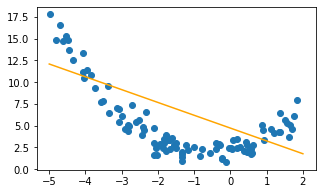

In [196]:
print(weights)

line_indpt = np.linspace(-5, 2, 500)
line = weights[0][1] * line_indpt + weights[0][0]
plt.figure(figsize=(5,3))
plt.scatter(d_nl['1'], d_nl["label"])
plt.plot(line_indpt, line, color="orange")

In [78]:
nn = NeuralNetwork(layers=2, training_data=data, epochs=10000, learn_rate=0.01, num_inputs=1)
nn.train()

[[-1.092798041883344, -0.49480167145947485], [-0.8328071561704362, -0.466513810172211]]


ValueError: operands could not be broadcast together with shapes (2,) (100,) 

In [35]:
np.random.randint(0, 10)

1